In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import model_selection

In [3]:
#Loading the train and test dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

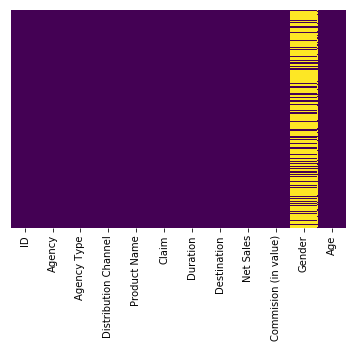

In [4]:
#Null values are maximum in Gender Variable in Train data
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

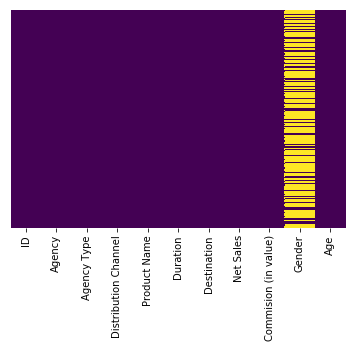

In [5]:
#Null values are maximum in Gender Variable in Test data
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
# Splitting features and target variables

X = train_data.drop('Claim',1)
y = train_data['Claim'].copy()

In [7]:
# Creating a dataset with full features for EDA and preprocessing
whole_data = X.append(test_data)
whole_data.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [8]:
# Identifying missing values
def missing_datas(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

missing_rec = missing_datas(whole_data)
mis_rec = missing_datas(X)
m_rec = missing_datas(test_data)
print(missing_rec)
print(mis_rec)
print(m_rec)

                      Total  Percent
Gender                45009   71.201
Age                       0    0.000
Commision (in value)      0    0.000
Net Sales                 0    0.000
Destination               0    0.000
Duration                  0    0.000
Product Name              0    0.000
Distribution Channel      0    0.000
Agency Type               0    0.000
Agency                    0    0.000
ID                        0    0.000
                      Total    Percent
Gender                35953  71.119419
Age                       0   0.000000
Commision (in value)      0   0.000000
Net Sales                 0   0.000000
Destination               0   0.000000
Duration                  0   0.000000
Product Name              0   0.000000
Distribution Channel      0   0.000000
Agency Type               0   0.000000
Agency                    0   0.000000
ID                        0   0.000000
                      Total    Percent
Gender                 9056  71.526736
Age       

In [9]:
# Function to drop missing values
def drop_missing(dataset, missing,value):
    dataset = dataset.drop((missing[missing['Percent'] > value]).index,axis= 1)
    print(dataset.isnull().sum().sort_values(ascending = False))
    return dataset 
    
whole_data=drop_missing(whole_data,missing_rec,70)
X = drop_missing(X,mis_rec,70)
test_data = drop_missing(test_data,m_rec,70)
whole_data.head()
X.head()
test_data.head()

Age                     0
Commision (in value)    0
Net Sales               0
Destination             0
Duration                0
Product Name            0
Distribution Channel    0
Agency Type             0
Agency                  0
ID                      0
dtype: int64
Age                     0
Commision (in value)    0
Net Sales               0
Destination             0
Duration                0
Product Name            0
Distribution Channel    0
Agency Type             0
Agency                  0
ID                      0
dtype: int64
Age                     0
Commision (in value)    0
Net Sales               0
Destination             0
Duration                0
Product Name            0
Distribution Channel    0
Agency Type             0
Agency                  0
ID                      0
dtype: int64


,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,25902,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,58,ICELAND,49.5,29.7,47
1,19535,EPX,Travel Agency,Online,2 way Comprehensive Plan,4,SINGAPORE,20.0,0.0,24
2,43717,EPX,Travel Agency,Online,2 way Comprehensive Plan,68,VIET NAM,20.0,0.0,36
3,48271,EPX,Travel Agency,Online,2 way Comprehensive Plan,41,CHINA,28.0,0.0,36
4,52318,EPX,Travel Agency,Online,Cancellation Plan,16,SINGAPORE,11.0,0.0,36


In [10]:
#check for numerical and categorical data

def numeric_func(dataset):
    numeric_col = dataset.select_dtypes(include=['number']).columns
    return numeric_col

def category_func(dataset):
    category_col = dataset.select_dtypes(include = 'O').columns
    return category_col

numeric_col = numeric_func(whole_data)
print('Numerical Features')
print(numeric_col)
print('+'*120)
category_col = category_func(whole_data)
print('Categorical Features')
print(category_col)

Numerical Features
Index(['ID', 'Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Categorical Features
Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination'],
      dtype='object')


In [11]:
print('X train data')
#Total number of train dataset
print(X.shape[0])
print('+'*120)

#Value_count of categorical features 
print('Categorical columns')
print(X[category_col].nunique())
print('+'*120)
print('Numerical Columns')
print(X[numeric_col].nunique())

#Total number of Dataset
print('Total Count of Dataset')
print(whole_data.shape[0])
print('+'*120)

#value_counts of Categorical features 
print('Categorical Columns in whole data')
print(whole_data[category_col].nunique())
print('+'*120)
print('Numerical Columns in whole data')
print(whole_data[numeric_col].nunique())


X train data
50553
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Categorical columns
Agency                   16
Agency Type               2
Distribution Channel      2
Product Name             25
Destination             102
dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Numerical Columns
ID                      50553
Duration                  444
Net Sales                1053
Commision (in value)      964
Age                        88
dtype: int64
Total Count of Dataset
63214
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Categorical Columns in whole data
Agency                   16
Agency Type               2
Distribution Channel      2
Product Name             25
Destination             102
dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++

In [12]:
#ID in test data is needed to submit predictions so we will store it for later
identity_col = test_data['ID'].copy()


X = X.drop('ID',1)
whole_data = whole_data.drop('ID',1)
test_data = test_data.drop('ID',1)


#recalculate numerical and categorical column
num_col = numeric_func(whole_data)
print(num_col)
cat_col = category_func(whole_data)
print(cat_col)

Index(['Duration', 'Net Sales', 'Commision (in value)', 'Age'], dtype='object')
Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Destination'],
      dtype='object')


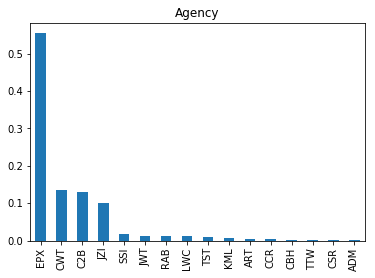

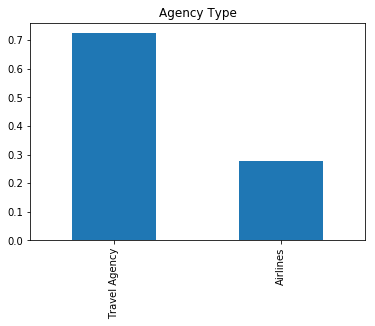

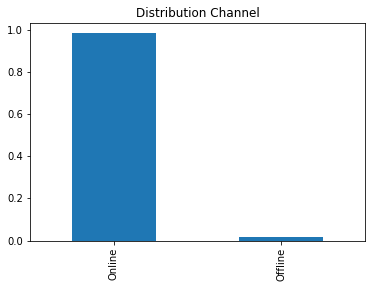

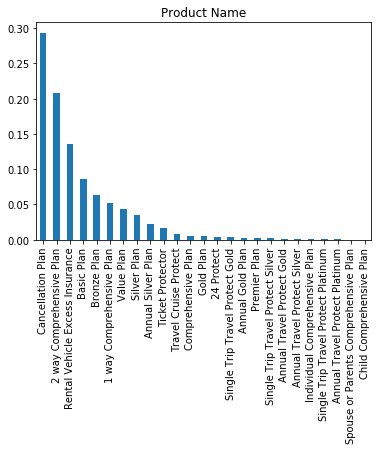

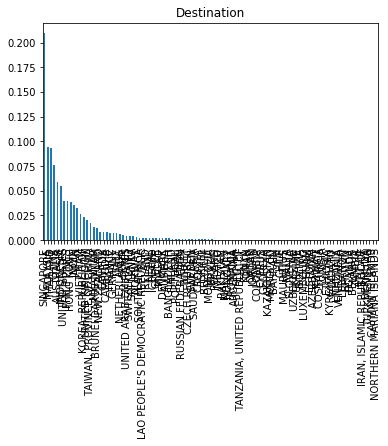

In [13]:
#ploting of categorical columns

def plot_categories(dataset):
    categorical_col = category_func(dataset)
    dataset = dataset[categorical_col]
    for i in dataset:
        plt.title(i)
        dataset[i].value_counts(normalize=True).plot(kind='bar')
        plt.show()
        
plot = plot_categories(whole_data)  

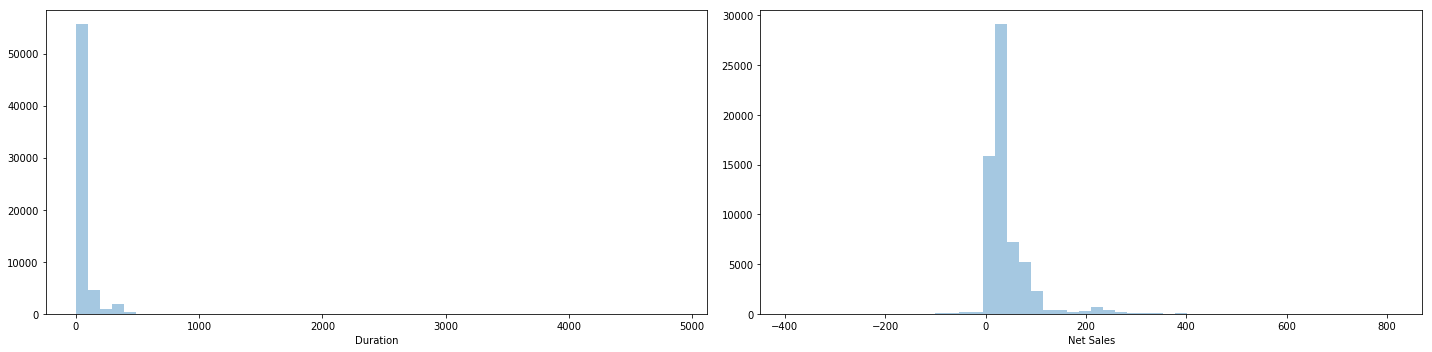

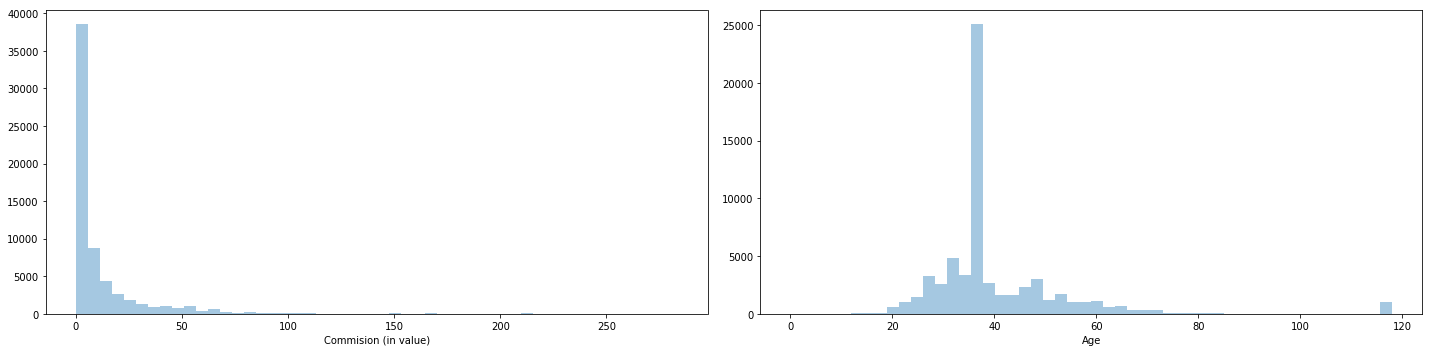

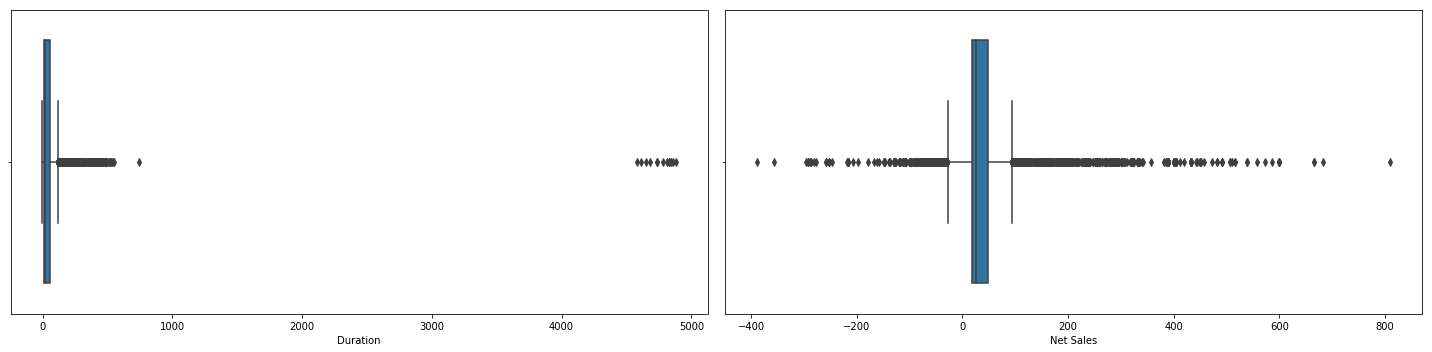

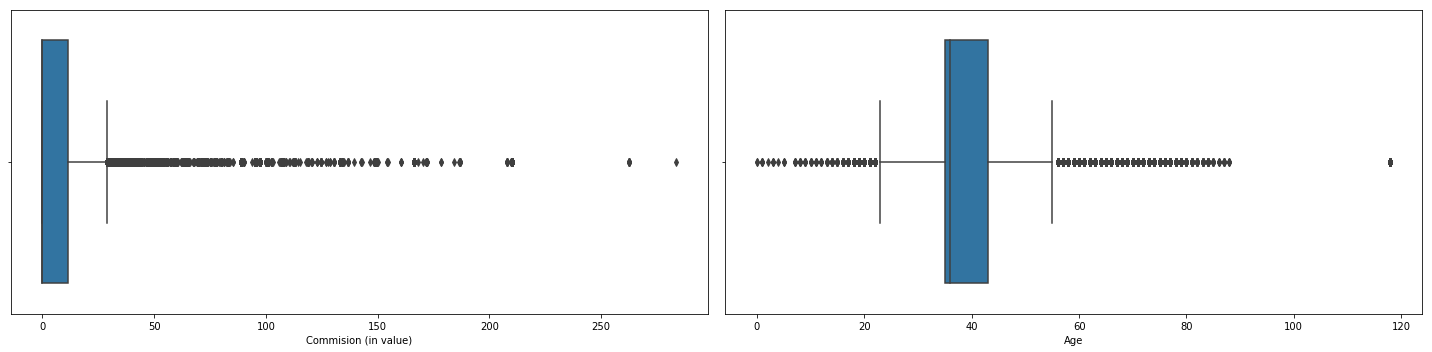

In [14]:
#plot of numerical columns

def plot_numeric(dataset):
    num_col = numeric_func(dataset)
    dataset = dataset[num_col]
    for i in range(0,len(num_col),2):
        if len(num_col) > i+1:
            plt.figure(figsize=(20,5))
            plt.subplot(121)
            sns.distplot(dataset[num_col[i]],kde=False)
            plt.subplot(122)
            sns.distplot(dataset[num_col[i+1]],kde=False)
            plt.tight_layout()
            plt.show()
        else:
            sns.boxplot(dataset[num_col[i]],kde=False)
def plot_boxplot(dataframe):
    num_col = numeric_func(dataframe)
    dataframe = dataframe[num_col]
    
    for i in range(0,len(num_col),2):
        if len(num_col) > i+1:
            plt.figure(figsize=(20,5))
            plt.subplot(121)
            sns.boxplot(dataframe[num_col[i]])
            plt.subplot(122)            
            sns.boxplot(dataframe[num_col[i+1]])
            plt.tight_layout()
            plt.show()

        else:
            sns.boxplot(dataframe[num_col[i]])
    
plot_numeric(whole_data)
plot_boxplot(whole_data)

In [15]:
X = X[X['Duration']>0]
X = X[X['Duration']<366]
X = X[X['Age']<=100]

y = y.iloc[X.index]
#print(y)

# Correlation Matrix

Highly Correlated Variables


Series([], dtype: float64)

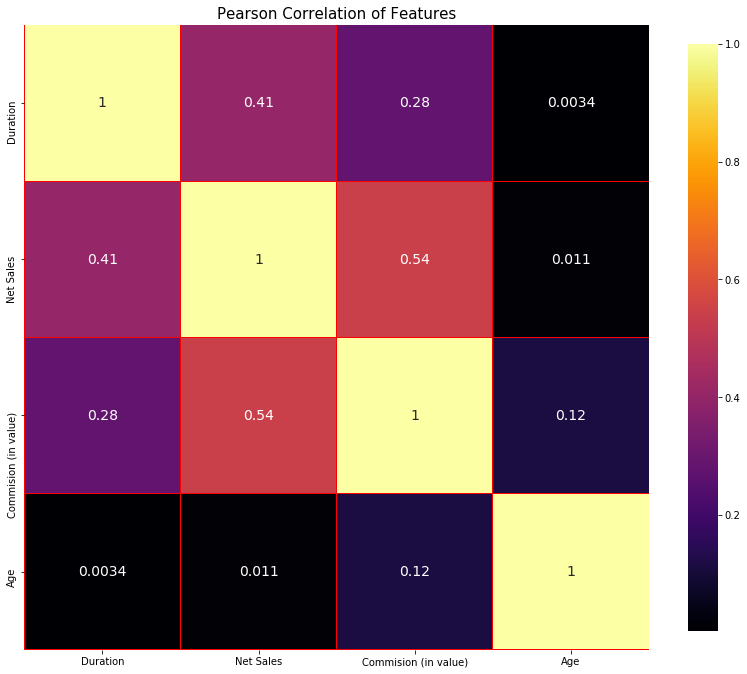

In [16]:
def correlation_heatmap(dataset):
    fig,ax = plt.subplots(figsize=(14,12))
    colormap = sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(dataset.corr(),cmap='inferno',
                square=True, 
                cbar_kws={'shrink':.9 }, 
                ax=ax,
                annot=True, 
                linewidth=0.1,vmax=1.0, linecolor='red',
                annot_kws={'fontsize':14}
               )
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    correlation = dataset.corr().unstack().sort_values(kind='quicksort')
    print('Highly Correlated Variables')
    return correlation[((correlation>=0.75) | (correlation<=-0.75)) & (correlation!=1)]


correlation_heatmap(X)

In [17]:
X.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age'],
      dtype='object')


# BaseLine Models with Label Encoding

In [18]:
# Dataset Preparation for Baseline Models

# Characteristics of Baseline models:
#   Encoding - Label Encomding
#   Charateristic Features - Unbinned
#   Numeric Features - Untransformed and Unscaled
#   Sampling - No Under/Over Sampling
#   Hyper parameters - No Grid Search
#   Baseline models / Estimators - Logistic Regression, Decision Tree, Random Forest
#   Ensembling - No Ensembling
#   Boosting - No boosting

#Datasets
X_1 = X.copy()
y_1 = y.copy()    

le = LabelEncoder()
for cols in cat_col:
    #whole_data[cols] = le.fit(whole_data[cols])
    X_1[cols] = le.fit_transform(X_1[cols])



#Train test split
X_train,X_test,y_train, y_test = train_test_split(X_1,y_1,test_size=0.3,random_state=0) 

In [19]:
X_train.dtypes

Agency                    int32
Agency Type               int32
Distribution Channel      int32
Product Name              int32
Duration                  int64
Destination               int32
Net Sales               float64
Commision (in value)    float64
Age                       int64
dtype: object

In [20]:
#Functions for models
def run_model(xtrain, xtest, ytrain, ytest, model):
    '''
    Performs model training and tests using ROC-AUC and precision 
    returns precision score
    '''
    model.fit(xtrain, ytrain)
    y_scores = model.predict(xtest)
    precision = precision_score(ytest, y_scores)
    confusion = confusion_matrix(ytest, y_scores)
    print(classification_report(ytest,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest, y_scores)
    print('Precision Score:',precision)
    print('Recall Score:',recall_score(y_test,y_scores))
    print('Roc Auc Score:',roc_auc_score(ytest,y_scores))
    print('Confusion Matrix:\n',confusion)
    
    plt.figure(figsize = (7,5))
    sns.heatmap(confusion, annot=True,cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    #fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return precision

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14404
           1       0.00      0.00      0.00       190

    accuracy                           0.99     14594
   macro avg       0.49      0.50      0.50     14594
weighted avg       0.97      0.99      0.98     14594

Precision Score: 0.0
Recall Score: 0.0
Roc Auc Score: 0.49996528742016105
Confusion Matrix:
 [[14403     1]
 [  190     0]]


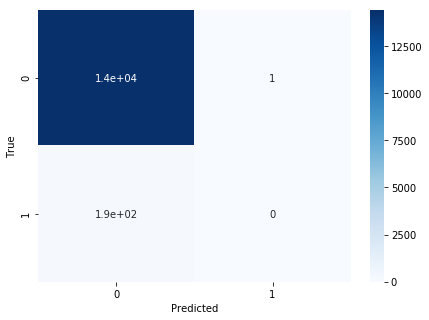

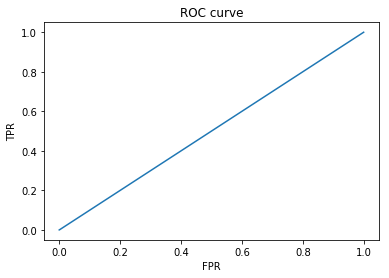

Precision Score = 0.00 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14404
           1       0.06      0.06      0.06       190

    accuracy                           0.97     14594
   macro avg       0.52      0.52      0.52     14594
weighted avg       0.98      0.97      0.97     14594

Precision Score: 0.055299539170506916
Recall Score: 0.06315789473684211
Roc Auc Score: 0.5244628685014396
Confusion Matrix:
 [[14199   205]
 [  178    12]]


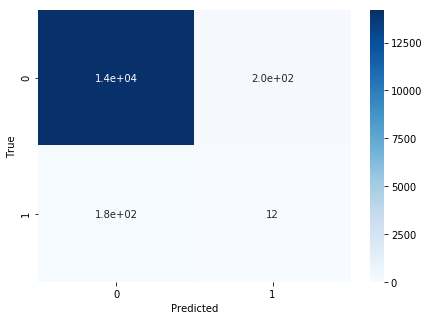

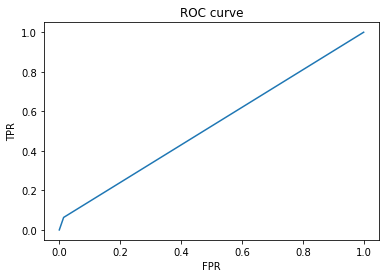

Precision Score = 5.53 %
On Model - 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14404
           1       0.00      0.00      0.00       190

    accuracy                           0.99     14594
   macro avg       0.49      0.50      0.50     14594
weighted avg       0.97      0.99      0.98     14594

Precision Score: 0.0
Recall Score: 0.0
Roc Auc Score: 0.4990974729241877
Confusion Matrix:
 [[14378    26]
 [  190     0]]


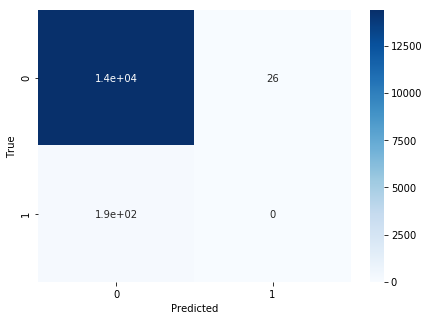

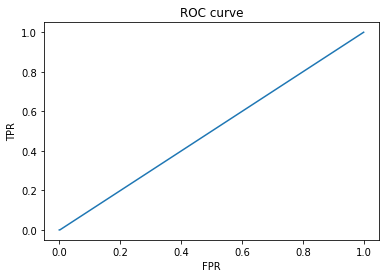

Precision Score = 0.00 %
On Model - 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14404
           1       0.00      0.00      0.00       190

    accuracy                           0.99     14594
   macro avg       0.49      0.50      0.50     14594
weighted avg       0.97      0.99      0.98     14594

Precision Score: 0.0
Recall Score: 0.0
Roc Auc Score: 0.5
Confusion Matrix:
 [[14404     0]
 [  190     0]]


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


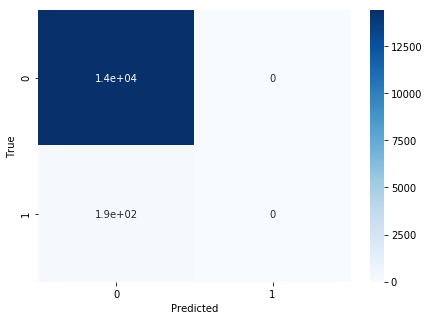

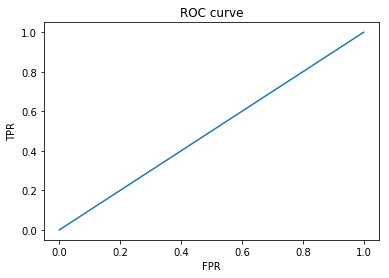

Precision Score = 0.00 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14404
           1       0.00      0.00      0.00       190

    accuracy                           0.99     14594
   macro avg       0.49      0.50      0.50     14594
weighted avg       0.97      0.99      0.98     14594

Precision Score: 0.0
Recall Score: 0.0
Roc Auc Score: 0.49996528742016105
Confusion Matrix:
 [[14403     1]
 [  190     0]]


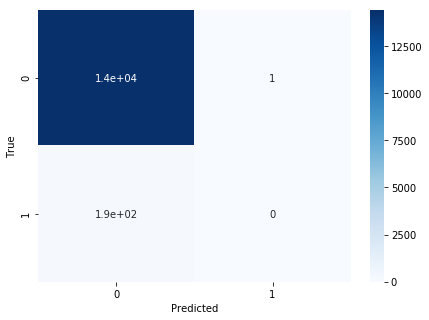

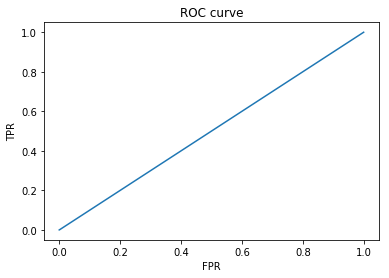

Precision Score = 0.00 %
On Model - 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [21]:
#Baseline Modeling

#Generating scores
lr = LogisticRegression(random_state=0)
dt = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
xgb = XGBClassifier(random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
#gnb = GaussianNB()
#svc = SVC(random_state=0)
model_list = [lr,dt,rf,xgb,gbc]

for model in model_list:
    precision = run_model(X_train,X_test,y_train,y_test,model)
    print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(model))
    
    print('===='*20)

# Label Encoding + Under/Over Sampling

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.82      0.90     14941
           1       0.05      0.67      0.10       225

    accuracy                           0.82     15166
   macro avg       0.52      0.74      0.50     15166
weighted avg       0.98      0.82      0.89     15166

Precision Score: 0.05263157894736842
Recall Score: 0.6666666666666666
Roc Auc Score: 0.7429779354349328
Confusion Matrix:
 [[12241  2700]
 [   75   150]]


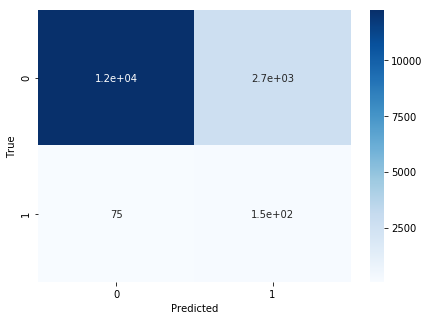

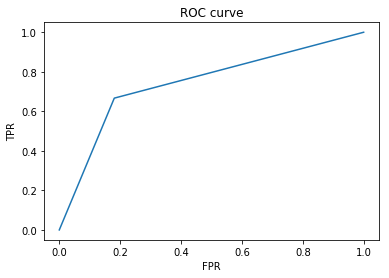

Precision Score = 5.26 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)%
On Sample - 
RandomUnderSampler(random_state=0, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     14941
           1       0.06      0.66      0.11       225

    accuracy                           0.83     15166
   macro avg       0.53      0.75      0.51     15166
weighted avg       0.98      0.83      0.90     15166

Precision Score: 0.057120802778849865
Recall Score: 0.6577777777777778
Roc Auc Score: 0.7471339862719288
Confusion Matrix:
 [[12498  2443]
 [   77   148]]


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


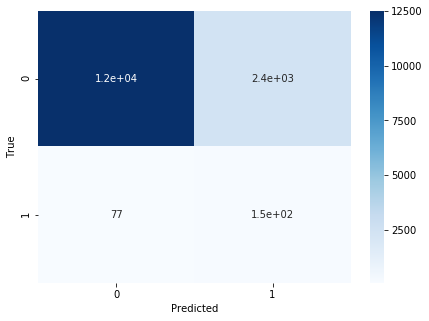

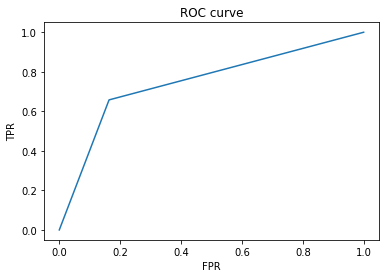

Precision Score = 5.71 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)%
On Sample - 
ClusterCentroids(estimator=None, n_jobs=1, random_state=0, ratio=None,
                 sampling_strategy='auto', voting='auto')


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14941
           1       0.00      0.00      0.00       225

    accuracy                           0.99     15166
   macro avg       0.49      0.50      0.50     15166
weighted avg       0.97      0.99      0.98     15166

Precision Score: 0.0
Recall Score: 0.0
Roc Auc Score: 0.5
Confusion Matrix:
 [[14941     0]
 [  225     0]]


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


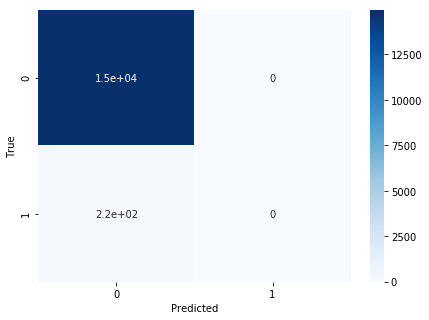

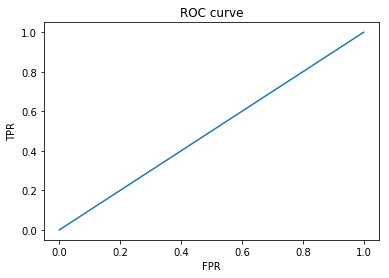

Precision Score = 0.00 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)%
On Sample - 
TomekLinks(n_jobs=1, random_state=0, ratio=None, return_indices=False,
           sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.63      0.77     14941
           1       0.03      0.69      0.05       225

    accuracy                           0.63     15166
   macro avg       0.51      0.66      0.41     15166
weighted avg       0.98      0.63      0.76     15166

Precision Score: 0.02766447951764497
Recall Score: 0.6933333333333334
Roc Auc Score: 0.6631782790085448
Confusion Matrix:
 [[9458 5483]
 [  69  156]]


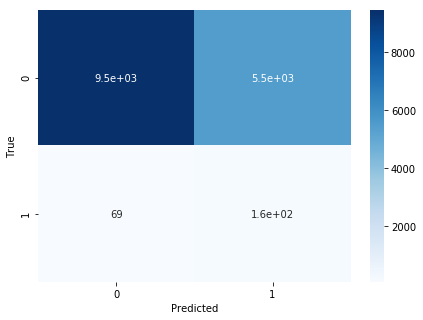

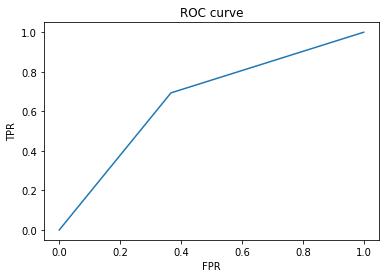

Precision Score = 2.77 %
On Model - 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')%
On Sample - 
RandomUnderSampler(random_state=0, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.29      0.45     14941
           1       0.02      0.88      0.04       225

    accuracy                           0.30     15166
   macro avg       0.51      0.58      0.24     15166
weighted avg       0.98      0.30      0.44     15166

Precision Score: 0.018212073587870945
Recall Score: 0.8755555555555555
Roc Auc Score: 0

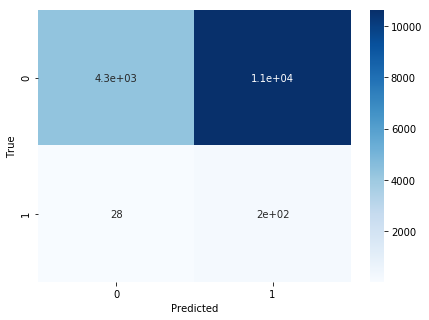

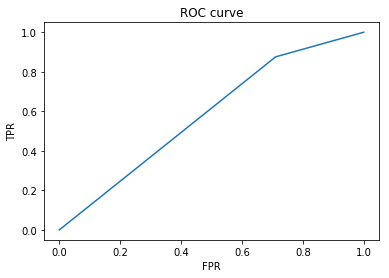

Precision Score = 1.82 %
On Model - 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')%
On Sample - 
ClusterCentroids(estimator=None, n_jobs=1, random_state=0, ratio=None,
                 sampling_strategy='auto', voting='auto')
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14941
           1       0.07      0.09      0.08       225

    accuracy                           0.97     15166
   macro avg       0.53      0.54      0.53     15166
weighted avg       0.97      0.97      0.97     15166

Precision Score: 0.06993006993006994
Recall Score: 0.08888888888888889
Roc Auc Score: 0.535

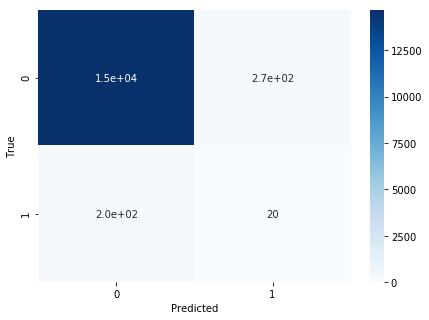

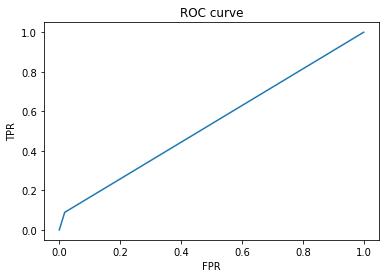

Precision Score = 6.99 %
On Model - 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')%
On Sample - 
TomekLinks(n_jobs=1, random_state=0, ratio=None, return_indices=False,
           sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.74      0.85     14941
           1       0.04      0.68      0.07       225

    accuracy                           0.74     15166
   macro avg       0.52      0.71      0.46     15166
weighted avg       0.98      0.74      0.84     15166

Precision Score: 0.03797152135898076
Recall Score: 0.6755555555555556
Roc Auc Score: 0.7089042084049111
Confusio

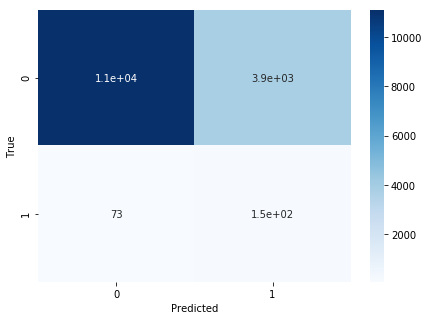

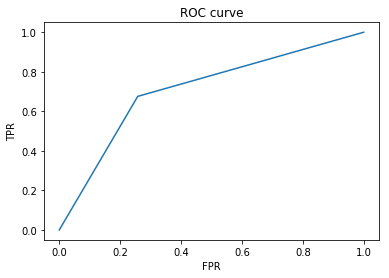

Precision Score = 3.80 %
On Model - 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)%
On Sample - 
RandomUnderSampler(random_state=0, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.38      0.55     14941
           1       0.02      0.84      0.04       225

    accuracy                           0.38     15166
   macro avg       0.51      0.61      0.29     15166
weighted avg       0.98      0.38      0.54     15166

Pr

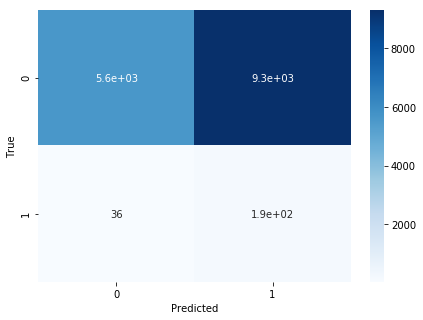

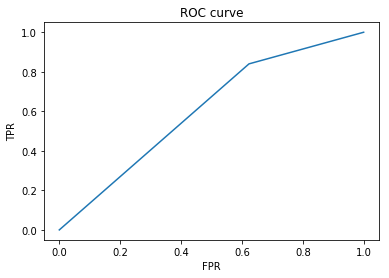

Precision Score = 1.99 %
On Model - 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)%
On Sample - 
ClusterCentroids(estimator=None, n_jobs=1, random_state=0, ratio=None,
                 sampling_strategy='auto', voting='auto')
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14941
           1       0.07      0.01      0.02       225

    accuracy                           0.98     15166
   macro avg       0.53      0.51      0.51     15166
weighted avg       0.97      0.98      0.98     15166

Precis

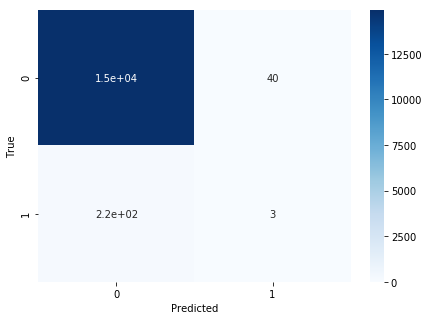

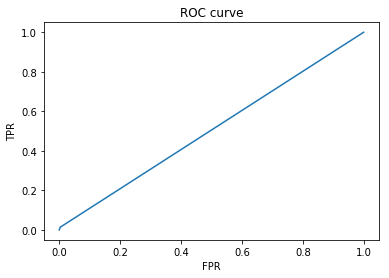

Precision Score = 6.98 %
On Model - 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)%
On Sample - 
TomekLinks(n_jobs=1, random_state=0, ratio=None, return_indices=False,
           sampling_strategy='auto')
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     14941
           1       0.04      0.76      0.08       225

    accuracy                           0.74     15166
   macro avg       0.52      0.75      0.46     15166
weighted avg       0.98      0.74      0.84     15166

Precision Score: 0.04154447

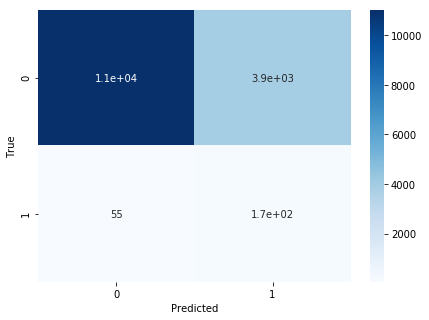

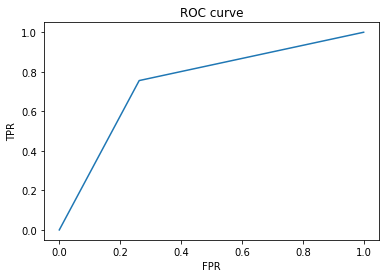

Precision Score = 4.15 %
On Model - 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)%
On Sample - 
RandomUnderSampler(random_state=0, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.34      0.51     14941
           1       0.02      0.83 

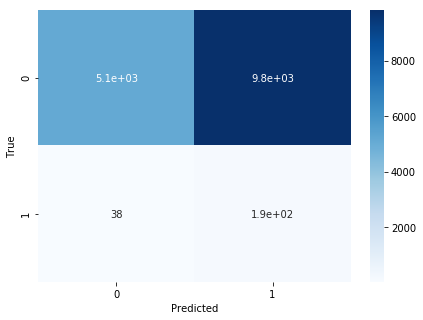

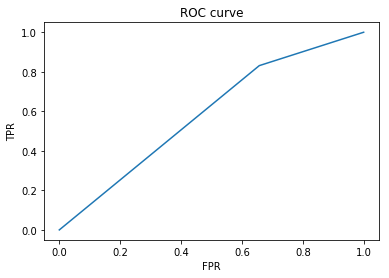

Precision Score = 1.87 %
On Model - 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)%
On Sample - 
ClusterCentroids(estimator=None, n_jobs=1, random_state=0, ratio=None,
                 sampling_strategy='auto', voting='auto')
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14941
           1       0.00      0.00     

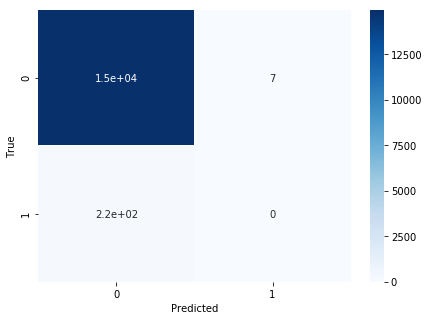

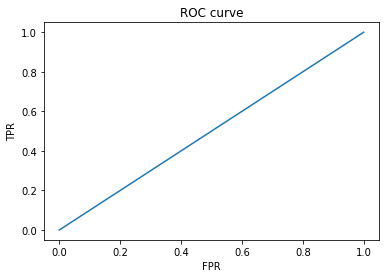

Precision Score = 0.00 %
On Model - 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)%
On Sample - 
TomekLinks(n_jobs=1, random_state=0, ratio=None, return_indices=False,
           sampling_strategy='auto')


In [31]:
# Baseline models with Under sampling
under_sampling = [RandomUnderSampler(random_state=0),ClusterCentroids(random_state=0),TomekLinks(random_state=0)]
model_list2 = [lr,dt,rf,gbc]

for model in model_list2:
    for sample in under_sampling:
        X_train2,y_train2 = sample.fit_sample(X_train,y_train)
        precision = run_model(X_train2,X_test,y_train2,y_test,model)
        print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(model)+'%\nOn Sample - \n'+str(sample))
    
        print('===='*20)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     14404
           1       0.04      0.75      0.07       190

    accuracy                           0.75     14594
   macro avg       0.52      0.75      0.46     14594
weighted avg       0.98      0.75      0.85     14594

Precision Score: 0.038399570354457575
Recall Score: 0.7526315789473684
Roc Auc Score: 0.7520100410704629
Confusion Matrix:
 [[10823  3581]
 [   47   143]]


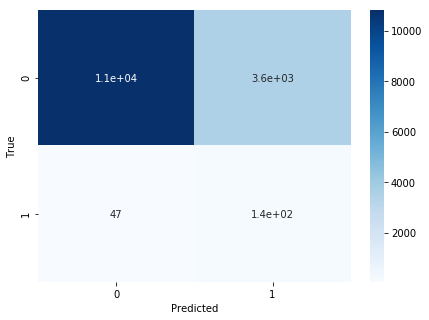

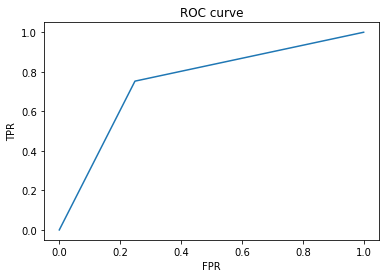

Precision Score = 3.84 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)%
On Sample - 
RandomUnderSampler(random_state=0, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.03      0.05     14404
           1       0.01      0.98      0.03       190

    accuracy                           0.04     14594
   macro avg       0.50      0.51      0.04     14594
weighted avg       0.98      0.04      0.05     14594

Precision Score: 0.

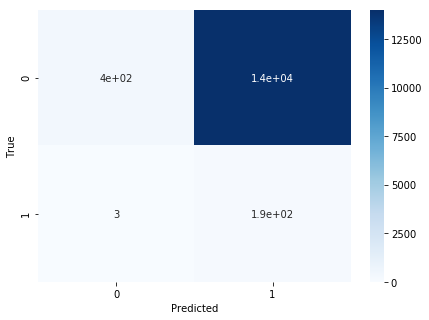

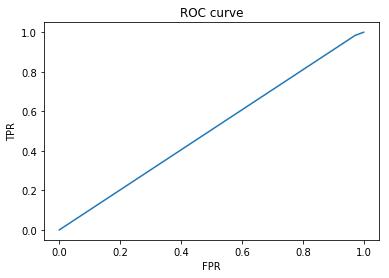

Precision Score = 1.32 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)%
On Sample - 
ClusterCentroids(estimator=None, n_jobs=1, random_state=0, ratio=None,
                 sampling_strategy='auto', voting='auto')
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14404
           1       0.00      0.00      0.00       190

    accuracy                           0.99     14594
   macro avg       0.49      0.50      0.50     14594
weighted avg       0.97      0.99      0.98     14594

Precision Score: 0.0
Re

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\l

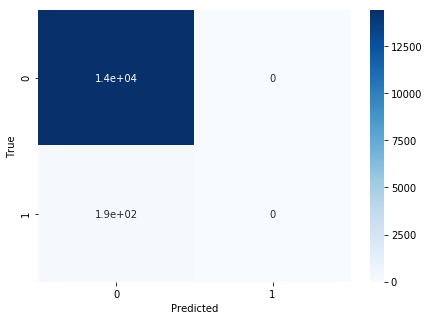

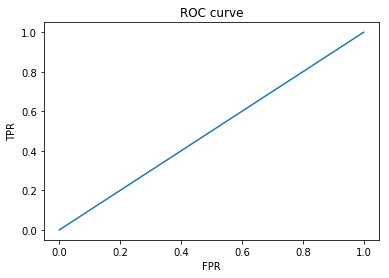

Precision Score = 0.00 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)%
On Sample - 
TomekLinks(n_jobs=1, random_state=0, ratio=None, return_indices=False,
           sampling_strategy='auto')


In [23]:
#Baseline xgb separately since it throws a mismatch error due to a bug
xgb = XGBClassifier()
for sample in under_sampling:
    X_train2,y_train2 = sample.fit_sample(X_train,y_train)
    X_test2 = X_test.values
    xgb.fit(X_train2,y_train2)
    y_scores = xgb.predict(X_test2)
    precision = precision_score(y_test, y_scores)
    confusion = confusion_matrix(y_test, y_scores)
    print(classification_report(y_test,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
    print('Precision Score:',precision_score(y_test, y_scores))
    print('Recall Score:',recall_score(y_test, y_scores))
    print('Roc Auc Score:',roc_auc_score(y_test,y_scores))
    print('Confusion Matrix:\n',confusion)
    plt.figure(figsize = (7,5))
    sns.heatmap(confusion, annot=True,cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(xgb)+'%\nOn Sample - \n'+str(sample))
    print('===='*20)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14941
           1       0.06      0.68      0.10       225

    accuracy                           0.83     15166
   macro avg       0.53      0.75      0.50     15166
weighted avg       0.98      0.83      0.89     15166

Precision Score: 0.05650557620817844
Recall Score: 0.6755555555555556
Roc Auc Score: 0.7528437037532814
Confusion Matrix:
 [[12403  2538]
 [   73   152]]


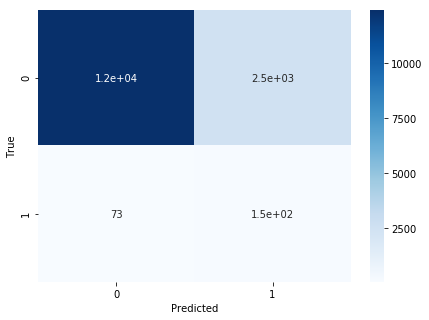

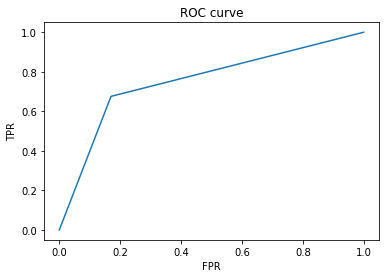

Precision Score = 5.65 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)%
On Sample - 
RandomOverSampler(random_state=0, ratio=None, return_indices=False,
                  sampling_strategy='auto')


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14941
           1       0.06      0.68      0.10       225

    accuracy                           0.82     15166
   macro avg       0.52      0.75      0.50     15166
weighted avg       0.98      0.82      0.89     15166

Precision Score: 0.055596196049743966
Recall Score: 0.6755555555555556
Roc Auc Score: 0.7513712454171593
Confusion Matrix:
 [[12359  2582]
 [   73   152]]


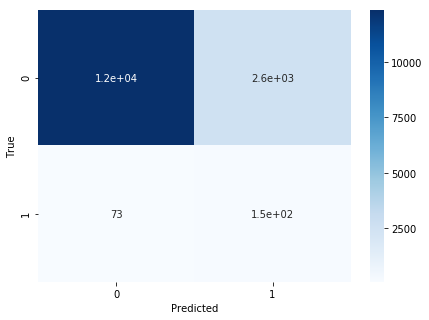

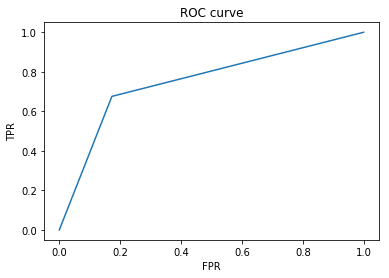

Precision Score = 5.56 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)%
On Sample - 
SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=0, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14941
           1       0.05      0.05      0.05       225

    accuracy                           0.97     15166
   macro avg       0.52      0.52      0.52     15166
weighted avg       0.97      0.97      0.97     15166

Precision Score: 0.04564315352697095
Recall Score: 0.04888888888888889
Roc Auc Score: 0.5167475031419881
Co

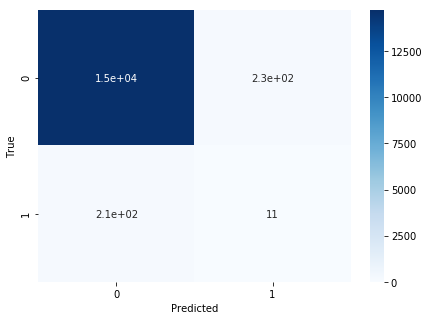

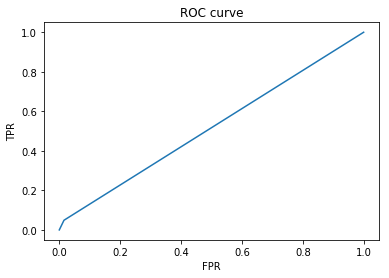

Precision Score = 4.56 %
On Model - 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')%
On Sample - 
RandomOverSampler(random_state=0, ratio=None, return_indices=False,
                  sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     14941
           1       0.05      0.11      0.06       225

    accuracy                           0.95     15166
   macro avg       0.52      0.54      0.52     15166
weighted avg       0.97      0.95      0.96     15166

Precision Score: 0.045889101338432124
Recall Score: 0.10666666666666667
Roc Auc Score: 0.5366343172032216
Co

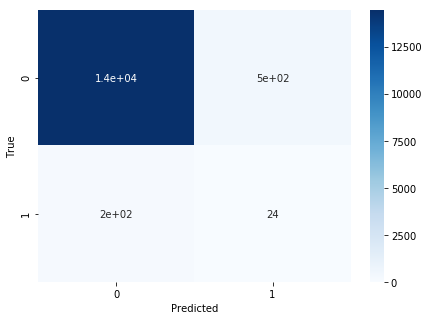

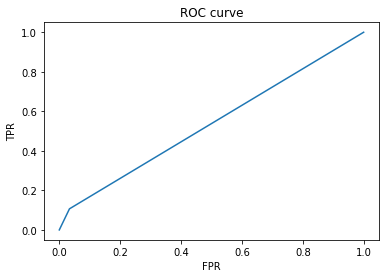

Precision Score = 4.59 %
On Model - 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')%
On Sample - 
SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=0, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14941
           1       0.07      0.04      0.05       225

    accuracy                           0.98     15166
   macro avg       0.53      0.51      0.52     15166
weighted avg       0.97      0.98      0.97     15166

Precision Score: 0.06504065

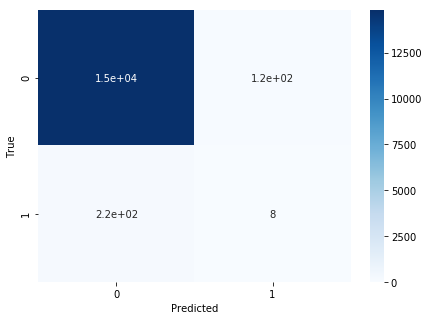

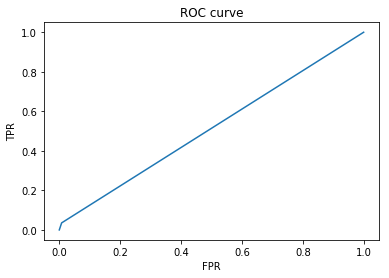

Precision Score = 6.50 %
On Model - 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)%
On Sample - 
RandomOverSampler(random_state=0, ratio=None, return_indices=False,
                  sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14941
           1       0.06      0.10      0.07       225

    accuracy                           0.96     15166
   macro avg       0.52      0.54      0.53     15166
weighted avg       0.97      0.96      0.97     15166

Precision Score: 0.0592

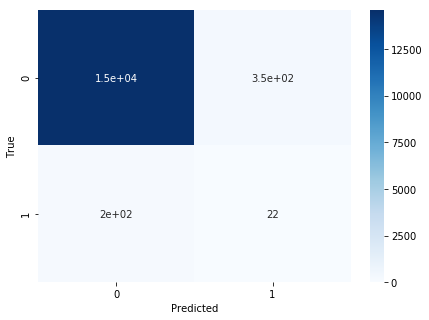

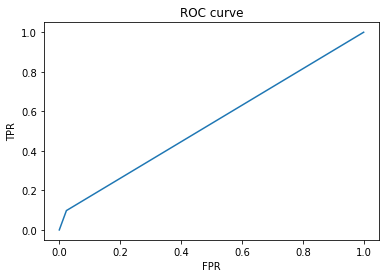

Precision Score = 5.93 %
On Model - 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)%
On Sample - 
SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=0, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')
              precision    recall  f1-score   support

           0       0.99      0.80      0.89     14941
           1       0.05      0.72      0.10       225

    accuracy                           0.80     15166
   macro avg       0.52      0.76      0.49     151

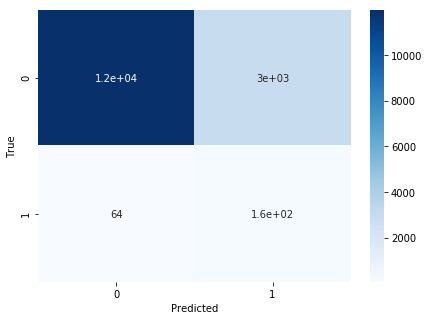

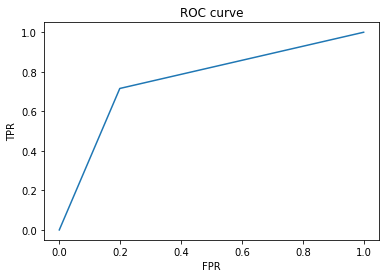

Precision Score = 5.14 %
On Model - 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)%
On Sample - 
RandomOverSampler(random_state=0, ratio=None, return_indices=False,
                  sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     14941
           1       0.06      0.64      0.11       225



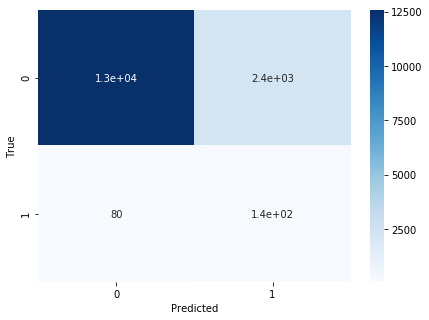

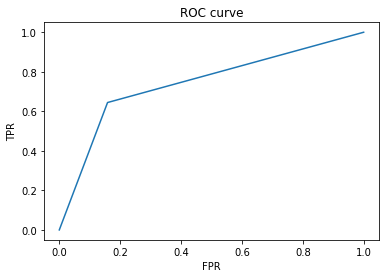

Precision Score = 5.77 %
On Model - 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)%
On Sample - 
SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=0, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')


In [32]:
#Baseline models with Over Sampling

over_sampling = [RandomOverSampler(random_state=0),SMOTE(random_state=0)]
for model in model_list2:
    for sample in over_sampling:
        X_train2,y_train2 = sample.fit_sample(X_train,y_train)
        precision = run_model(X_train2,X_test,y_train2,y_test,model)
        print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(model)+'%\nOn Sample - \n'+str(sample))
    
        print('===='*20)

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     14404
           1       0.04      0.68      0.08       190

    accuracy                           0.80     14594
   macro avg       0.52      0.75      0.49     14594
weighted avg       0.98      0.80      0.88     14594

Precision Score: 0.044490075290896644
Recall Score: 0.6842105263157895
Roc Auc Score: 0.7451877402475919
Confusion Matrix:
 [[11612  2792]
 [   60   130]]


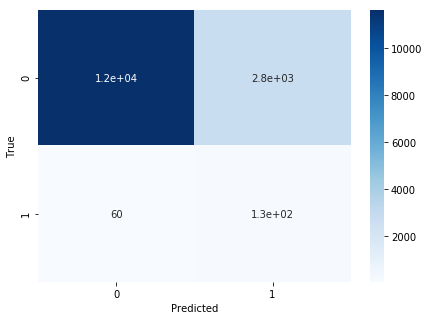

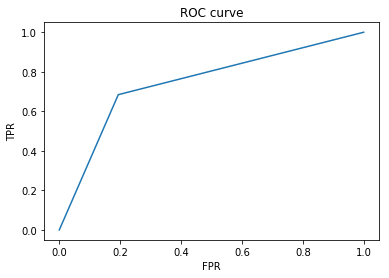

Precision Score = 4.45 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)%
On Sample - 
RandomOverSampler(random_state=0, ratio=None, return_indices=False,
                  sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.88      0.94     14404
           1       0.06      0.57      0.11       190

    accuracy                           0.88     14594
   macro avg       0.53      0.73      0.52     14594
weighted avg       0.98      0.88      0.92     14594

Precision Score: 0.061132922041503085
Re

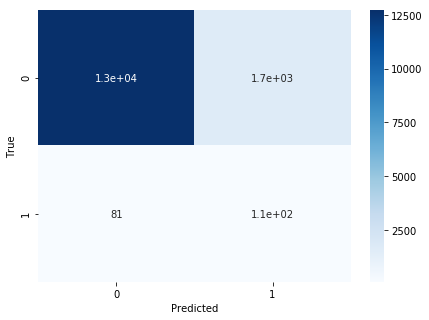

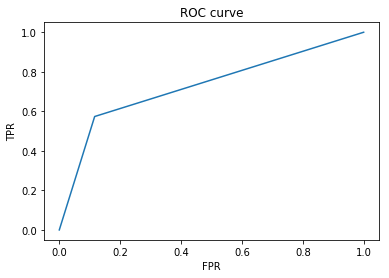

Precision Score = 6.11 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)%
On Sample - 
SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=0, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')


In [25]:
#Baseline xgb separately since it throws a mismatch error due to a bug
xgb = XGBClassifier()
for sample in over_sampling:
    X_train2,y_train2 = sample.fit_sample(X_train,y_train)
    X_test2 = X_test.values
    xgb.fit(X_train2,y_train2)
    y_scores = xgb.predict(X_test2)
    precision = precision_score(y_test, y_scores)
    confusion = confusion_matrix(y_test, y_scores)
    print(classification_report(y_test,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
    print('Precision Score:',precision_score(y_test, y_scores))
    print('Recall Score:',recall_score(y_test,y_scores))
    print('Roc Auc Score:',roc_auc_score(y_test,y_scores))
    print('Confusion Matrix:\n',confusion)
    plt.figure(figsize = (7,5))
    sns.heatmap(confusion, annot=True,cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(xgb)+'%\nOn Sample - \n'+str(sample))
    print('===='*20)

# LE + Log Transformation & Scaling with under/over sampling

In [26]:
#LE + Log Tranformation + Scaling

#Data import and Preprocessing
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
X = train_data.drop('Claim',1)
y = train_data['Claim'].copy()
# Creating a dataset with full features for EDA and preprocessing
#whole_data = X.append(test_data)
#whole_data.head()
#Drop columns with missing values
#whole_data = whole_data.drop('Gender',1)
test_data = test_data.drop('Gender',1)
X = X.drop('Gender',1)
#ID in test data is needed to submit predictions so we will store it for later
identifiers = test_data['ID'].copy()

#Drop irrelevant features
X = X.drop('ID',1)
#whole_data = whole_data.drop('ID',1)
test_data = test_data.drop('ID',1)

#Recalculating numeric & categorical features
numeric_columns = numeric_func(X)
categorical_columns = category_func(X)

#Datasets
num_col = ['Duration','Net Sales', 'Commision (in value)', 'Age']
X_3 = X.copy()
y_3 = y.copy()

#Since Net Sales & Duration have negative values
for col in num_col:
    if col == 'Net Sales':
        X_3[col] = np.log1p(389+X_3[col])
    elif col == 'Duration':
        X_3[col] = np.log1p(2+X_3[col])
    else:
        X_3[col] = np.log1p(X_3[col])

scaler = StandardScaler()
X_3[num_col]=scaler.fit_transform(X_3[num_col])

#Label Encoding
le = LabelEncoder()
for cols in categorical_columns:
    #le.fit(whole_data[cols])
    X_3[cols] = le.fit_transform(X_3[cols])
    
#Train test split
X_train,X_test,y_train, y_test = train_test_split(X_3,y_3,test_size=0.3,random_state=0)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.82      0.90     14941
           1       0.05      0.67      0.10       225

    accuracy                           0.82     15166
   macro avg       0.52      0.74      0.50     15166
weighted avg       0.98      0.82      0.89     15166

Precision Score: 0.05263157894736842
Recall Score: 0.6666666666666666
Roc Auc Score: 0.7429779354349328
Confusion Matrix:
 [[12241  2700]
 [   75   150]]


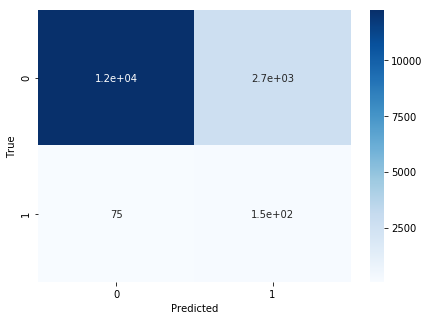

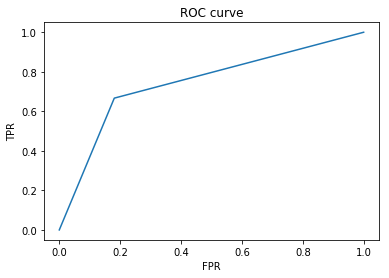

Precision Score = 5.26 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)%
On Sample - 
RandomUnderSampler(random_state=0, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.84      0.91     14941
           1       0.06      0.66      0.11       225

    accuracy                           0.83     15166
   macro avg       0.53      0.75      0.51     15166
weighted avg       0.98      0.83      0.90     15166

Precision Score: 0.057120802778849865
Recall Score: 0.6577777777777778
Roc Auc Score: 0.7471339862719288
Confusion Matrix:
 [[12498  2443]
 [   77   148]]


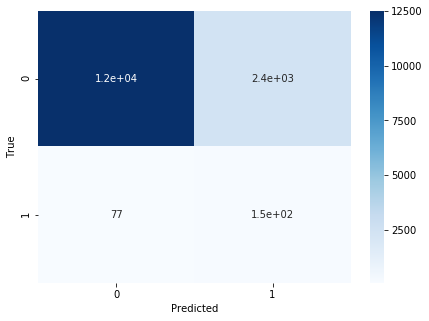

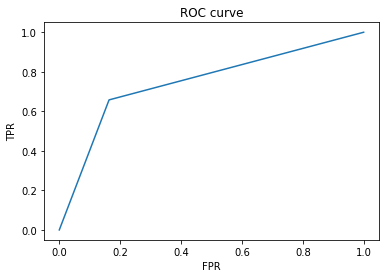

Precision Score = 5.71 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)%
On Sample - 
ClusterCentroids(estimator=None, n_jobs=1, random_state=0, ratio=None,
                 sampling_strategy='auto', voting='auto')


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classificat

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14941
           1       0.00      0.00      0.00       225

    accuracy                           0.99     15166
   macro avg       0.49      0.50      0.50     15166
weighted avg       0.97      0.99      0.98     15166

Precision Score: 0.0
Recall Score: 0.0
Roc Auc Score: 0.5
Confusion Matrix:
 [[14941     0]
 [  225     0]]


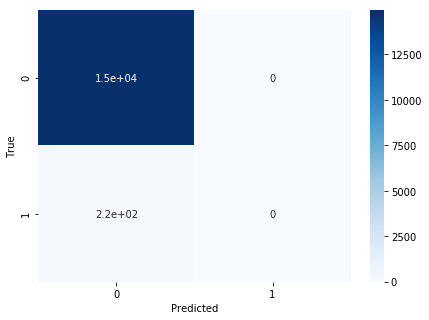

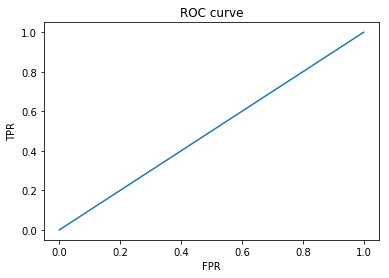

Precision Score = 0.00 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)%
On Sample - 
TomekLinks(n_jobs=1, random_state=0, ratio=None, return_indices=False,
           sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.63      0.77     14941
           1       0.03      0.69      0.05       225

    accuracy                           0.63     15166
   macro avg       0.51      0.66      0.41     15166
weighted avg       0.98      0.63      0.76     15166

Precision Score: 0.02766447951764497
Recall Score: 0.6933333333333334
Roc Auc Score: 0.6631782790085448
Confusion Matrix:
 [[9458 5483]
 [  69  156]]


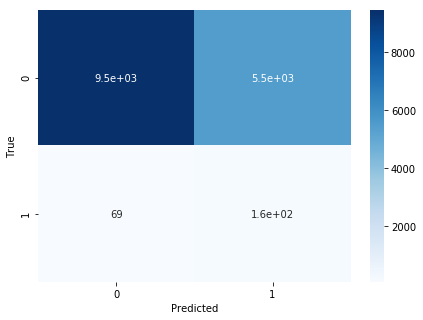

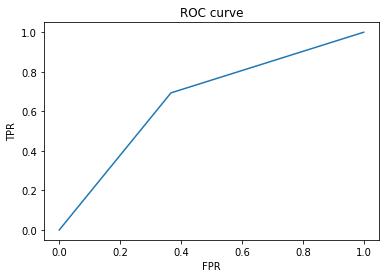

Precision Score = 2.77 %
On Model - 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')%
On Sample - 
RandomUnderSampler(random_state=0, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.29      0.45     14941
           1       0.02      0.88      0.04       225

    accuracy                           0.30     15166
   macro avg       0.51      0.58      0.24     15166
weighted avg       0.98      0.30      0.44     15166

Precision Score: 0.018212073587870945
Recall Score: 0.8755555555555555
Roc Auc Score: 0

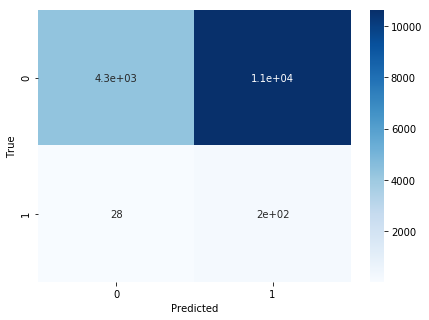

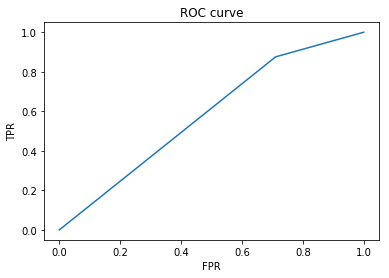

Precision Score = 1.82 %
On Model - 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')%
On Sample - 
ClusterCentroids(estimator=None, n_jobs=1, random_state=0, ratio=None,
                 sampling_strategy='auto', voting='auto')
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14941
           1       0.07      0.09      0.08       225

    accuracy                           0.97     15166
   macro avg       0.53      0.54      0.53     15166
weighted avg       0.97      0.97      0.97     15166

Precision Score: 0.06993006993006994
Recall Score: 0.08888888888888889
Roc Auc Score: 0.535

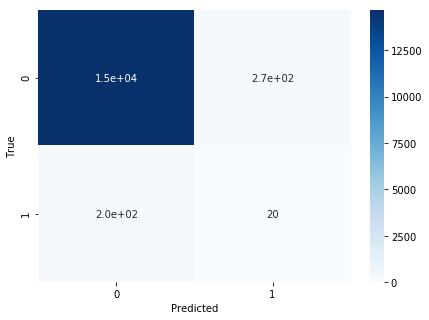

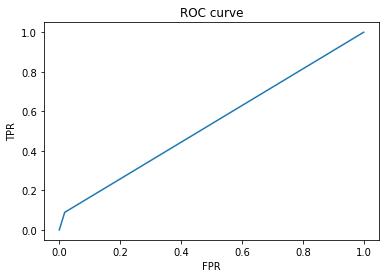

Precision Score = 6.99 %
On Model - 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')%
On Sample - 
TomekLinks(n_jobs=1, random_state=0, ratio=None, return_indices=False,
           sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.74      0.85     14941
           1       0.04      0.68      0.07       225

    accuracy                           0.74     15166
   macro avg       0.52      0.71      0.46     15166
weighted avg       0.98      0.74      0.84     15166

Precision Score: 0.03797152135898076
Recall Score: 0.6755555555555556
Roc Auc Score: 0.7089042084049111
Confusio

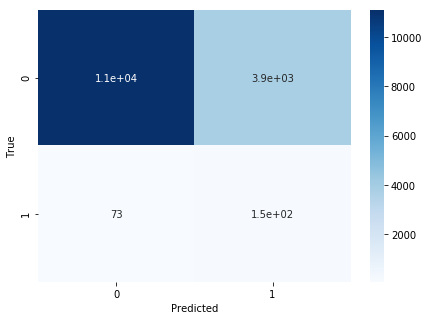

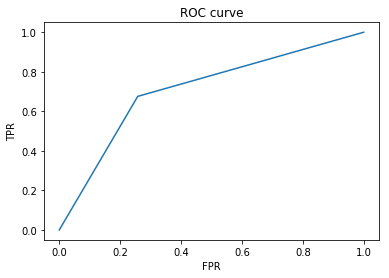

Precision Score = 3.80 %
On Model - 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)%
On Sample - 
RandomUnderSampler(random_state=0, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.38      0.55     14941
           1       0.02      0.84      0.04       225

    accuracy                           0.38     15166
   macro avg       0.51      0.61      0.29     15166
weighted avg       0.98      0.38      0.54     15166

Pr

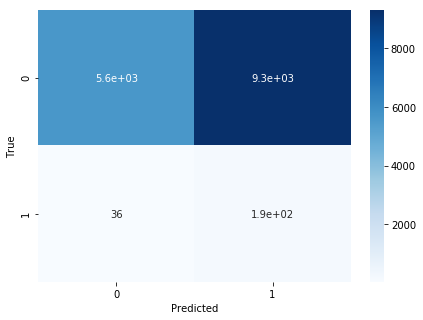

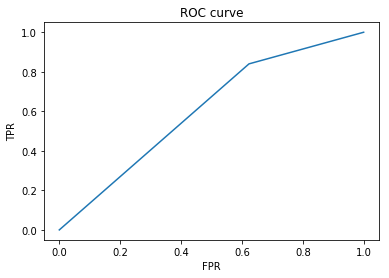

Precision Score = 1.99 %
On Model - 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)%
On Sample - 
ClusterCentroids(estimator=None, n_jobs=1, random_state=0, ratio=None,
                 sampling_strategy='auto', voting='auto')
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14941
           1       0.07      0.01      0.02       225

    accuracy                           0.98     15166
   macro avg       0.53      0.51      0.51     15166
weighted avg       0.97      0.98      0.98     15166

Precis

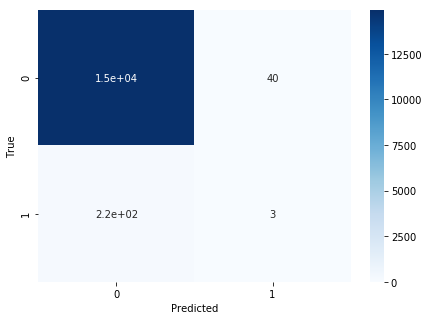

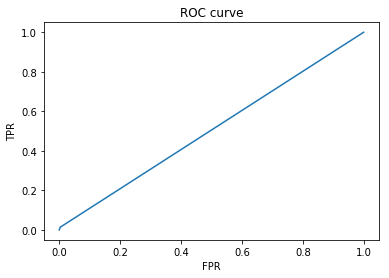

Precision Score = 6.98 %
On Model - 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)%
On Sample - 
TomekLinks(n_jobs=1, random_state=0, ratio=None, return_indices=False,
           sampling_strategy='auto')
              precision    recall  f1-score   support

           0       1.00      0.74      0.85     14941
           1       0.04      0.76      0.08       225

    accuracy                           0.74     15166
   macro avg       0.52      0.75      0.46     15166
weighted avg       0.98      0.74      0.84     15166

Precision Score: 0.04154447

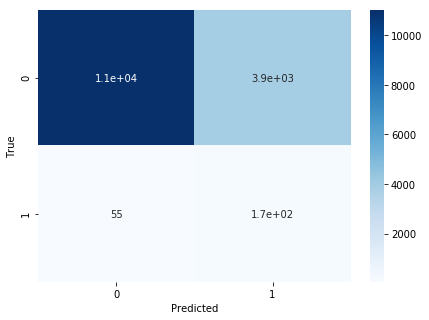

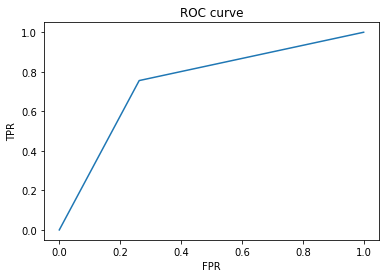

Precision Score = 4.15 %
On Model - 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)%
On Sample - 
RandomUnderSampler(random_state=0, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.34      0.51     14941
           1       0.02      0.83 

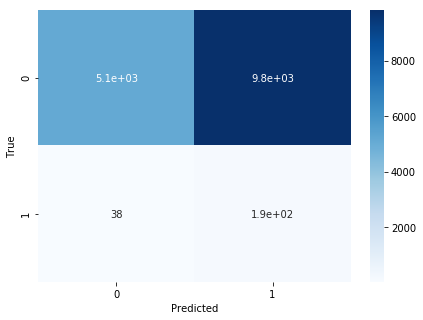

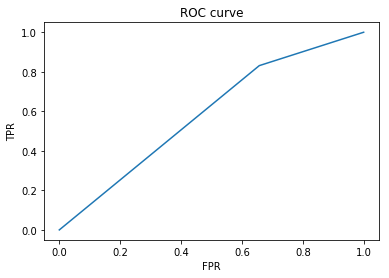

Precision Score = 1.87 %
On Model - 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)%
On Sample - 
ClusterCentroids(estimator=None, n_jobs=1, random_state=0, ratio=None,
                 sampling_strategy='auto', voting='auto')
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14941
           1       0.00      0.00     

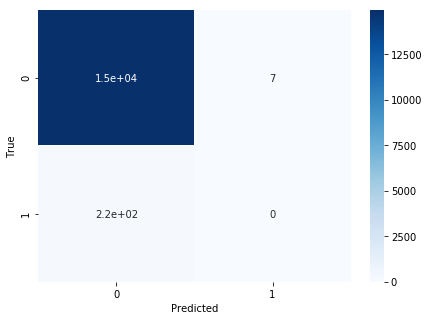

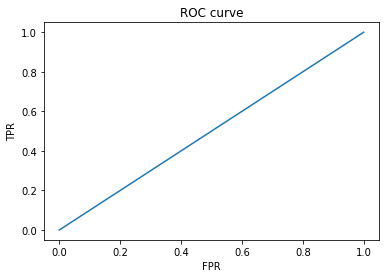

Precision Score = 0.00 %
On Model - 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)%
On Sample - 
TomekLinks(n_jobs=1, random_state=0, ratio=None, return_indices=False,
           sampling_strategy='auto')


In [33]:
#LE + Log Tranformation + Scaling with under sampling
for model in model_list2:
    for sample in under_sampling:
        X_train2,y_train2 = sample.fit_sample(X_train,y_train)
        precision = run_model(X_train2,X_test,y_train2,y_test,model)
        print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(model)+'%\nOn Sample - \n'+str(sample))
    
        print('===='*20)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     14941
           1       0.04      0.75      0.08       225

    accuracy                           0.75     15166
   macro avg       0.52      0.75      0.47     15166
weighted avg       0.98      0.75      0.84     15166

Precision Score: 0.04337782340862423
Recall Score: 0.7511111111111111
Roc Auc Score: 0.7508316414935783
Confusion Matrix:
 [[11214  3727]
 [   56   169]]


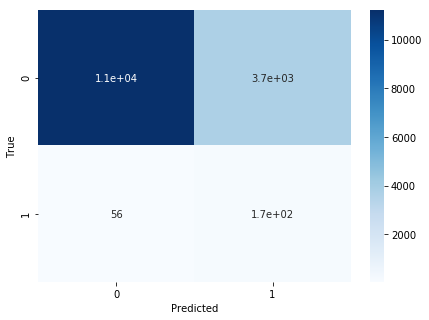

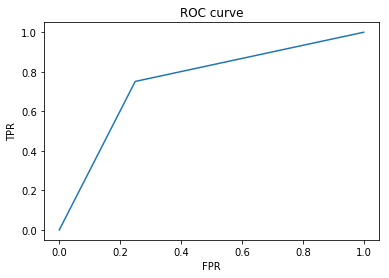

Precision Score = 4.34 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)%
On Sample - 
RandomUnderSampler(random_state=0, ratio=None, replacement=False,
                   return_indices=False, sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.25      0.39     14941
           1       0.02      0.86      0.03       225

    accuracy                           0.25     15166
   macro avg       0.50      0.55      0.21     15166
weighted avg       0.98      0.25      0.39     15166

Precision Score: 0.

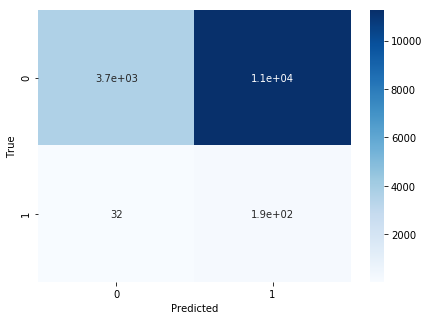

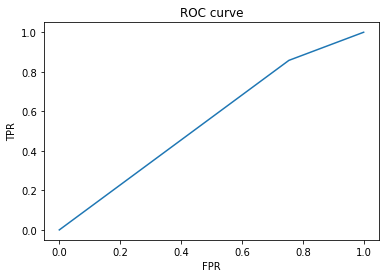

Precision Score = 1.68 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)%
On Sample - 
ClusterCentroids(estimator=None, n_jobs=1, random_state=0, ratio=None,
                 sampling_strategy='auto', voting='auto')
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     14941
           1       0.00      0.00      0.00       225

    accuracy                           0.99     15166
   macro avg       0.49      0.50      0.50     15166
weighted avg       0.97      0.99      0.98     15166

Precision Score: 0.0
Re

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\l

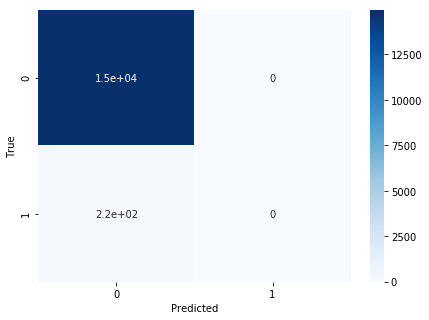

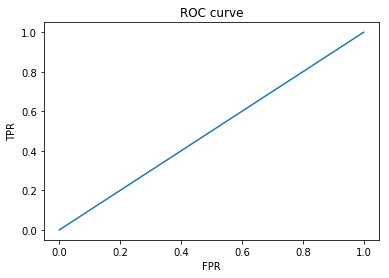

Precision Score = 0.00 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)%
On Sample - 
TomekLinks(n_jobs=1, random_state=0, ratio=None, return_indices=False,
           sampling_strategy='auto')


In [28]:
#LE + Log Tranformation + Scaling with under sampling - Running xgb separately since it throws a mismatch error due to a bug
xgb = XGBClassifier()
for sample in under_sampling:
    X_train2,y_train2 = sample.fit_sample(X_train,y_train)
    X_test2 = X_test.values
    xgb.fit(X_train2,y_train2)
    y_scores = xgb.predict(X_test2)
    precision = precision_score(y_test, y_scores)
    confusion = confusion_matrix(y_test, y_scores)
    print(classification_report(y_test,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
    print('Precision Score:',precision_score(y_test, y_scores))
    print('Recall Score:',recall_score(y_test, y_scores))
    print('Roc Auc Score:',roc_auc_score(y_test,y_scores))
    print('Confusion Matrix:\n',confusion)
    plt.figure(figsize = (7,5))
    sns.heatmap(confusion, annot=True,cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(xgb)+'%\nOn Sample - \n'+str(sample))
    print('===='*20)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14941
           1       0.06      0.68      0.10       225

    accuracy                           0.83     15166
   macro avg       0.53      0.75      0.50     15166
weighted avg       0.98      0.83      0.89     15166

Precision Score: 0.05650557620817844
Recall Score: 0.6755555555555556
Roc Auc Score: 0.7528437037532814
Confusion Matrix:
 [[12403  2538]
 [   73   152]]


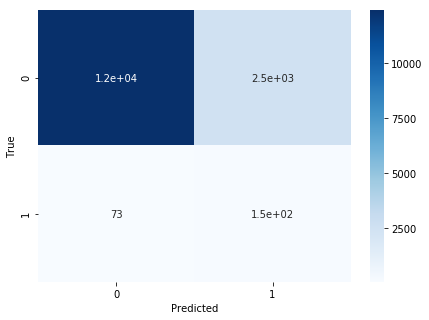

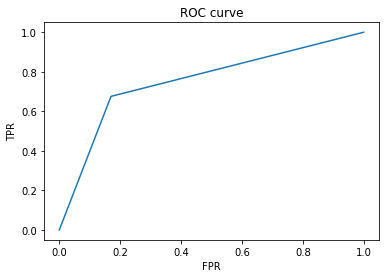

Precision Score = 5.65 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)%
On Sample - 
RandomOverSampler(random_state=0, ratio=None, return_indices=False,
                  sampling_strategy='auto')


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.99      0.83      0.90     14941
           1       0.06      0.68      0.10       225

    accuracy                           0.82     15166
   macro avg       0.52      0.75      0.50     15166
weighted avg       0.98      0.82      0.89     15166

Precision Score: 0.055596196049743966
Recall Score: 0.6755555555555556
Roc Auc Score: 0.7513712454171593
Confusion Matrix:
 [[12359  2582]
 [   73   152]]


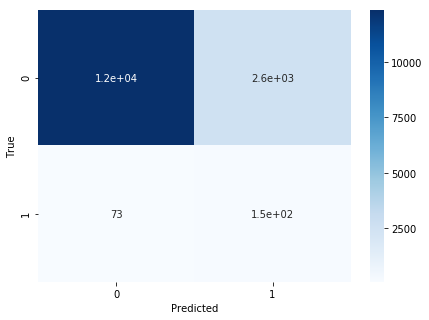

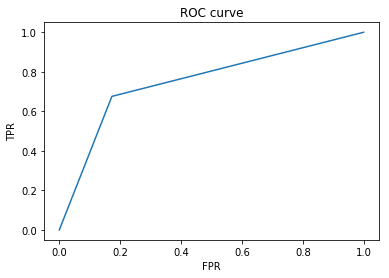

Precision Score = 5.56 %
On Model - 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)%
On Sample - 
SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=0, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14941
           1       0.05      0.05      0.05       225

    accuracy                           0.97     15166
   macro avg       0.52      0.52      0.52     15166
weighted avg       0.97      0.97      0.97     15166

Precision Score: 0.04564315352697095
Recall Score: 0.04888888888888889
Roc Auc Score: 0.5167475031419881
Co

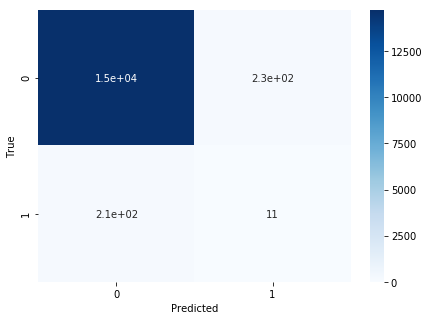

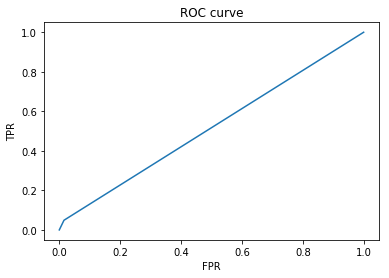

Precision Score = 4.56 %
On Model - 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')%
On Sample - 
RandomOverSampler(random_state=0, ratio=None, return_indices=False,
                  sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     14941
           1       0.05      0.11      0.06       225

    accuracy                           0.95     15166
   macro avg       0.52      0.54      0.52     15166
weighted avg       0.97      0.95      0.96     15166

Precision Score: 0.045889101338432124
Recall Score: 0.10666666666666667
Roc Auc Score: 0.5366343172032216
Co

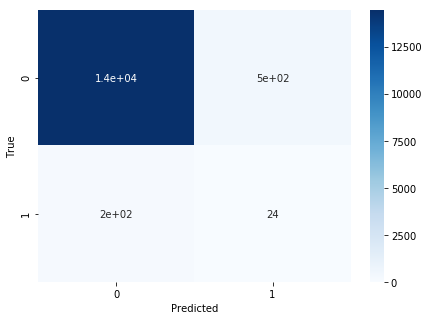

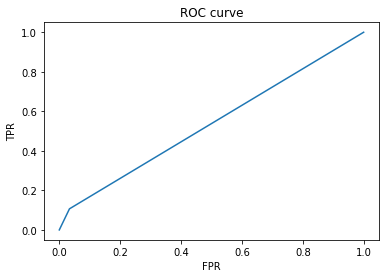

Precision Score = 4.59 %
On Model - 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')%
On Sample - 
SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=0, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14941
           1       0.07      0.04      0.05       225

    accuracy                           0.98     15166
   macro avg       0.53      0.51      0.52     15166
weighted avg       0.97      0.98      0.97     15166

Precision Score: 0.06504065

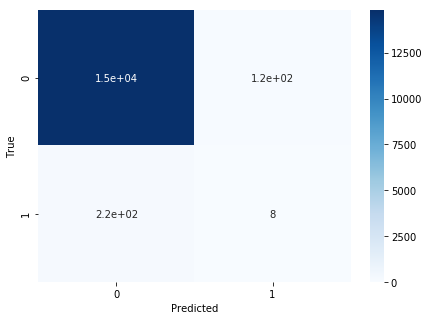

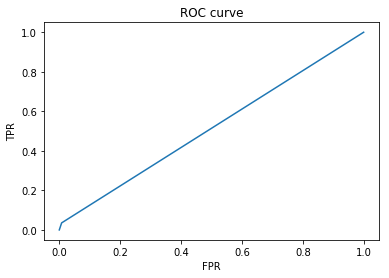

Precision Score = 6.50 %
On Model - 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)%
On Sample - 
RandomOverSampler(random_state=0, ratio=None, return_indices=False,
                  sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14941
           1       0.06      0.10      0.07       225

    accuracy                           0.96     15166
   macro avg       0.52      0.54      0.53     15166
weighted avg       0.97      0.96      0.97     15166

Precision Score: 0.0592

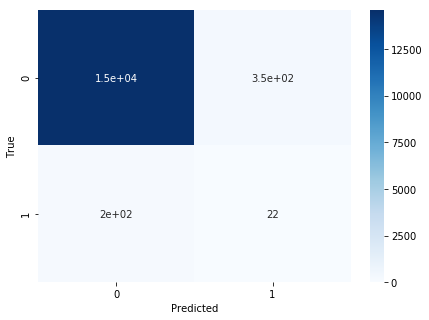

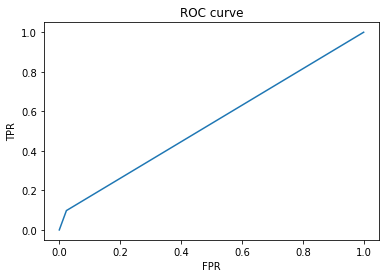

Precision Score = 5.93 %
On Model - 
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)%
On Sample - 
SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=0, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')
              precision    recall  f1-score   support

           0       0.99      0.80      0.89     14941
           1       0.05      0.72      0.10       225

    accuracy                           0.80     15166
   macro avg       0.52      0.76      0.49     151

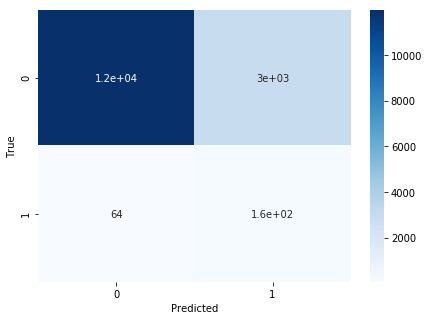

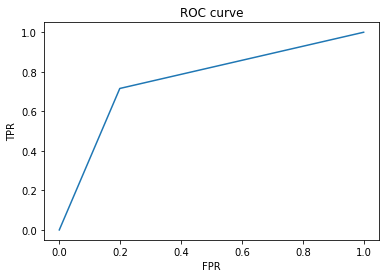

Precision Score = 5.14 %
On Model - 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)%
On Sample - 
RandomOverSampler(random_state=0, ratio=None, return_indices=False,
                  sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     14941
           1       0.06      0.64      0.11       225



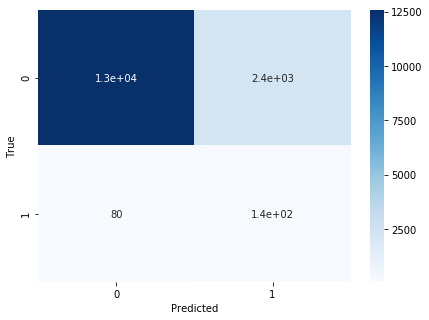

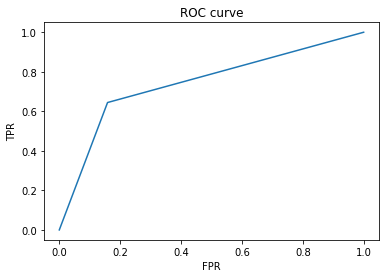

Precision Score = 5.77 %
On Model - 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)%
On Sample - 
SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=0, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')


In [34]:
#LE + Log Tranformation + Scaling with over sampling
for model in model_list2:
    for sample in over_sampling:
        X_train2,y_train2 = sample.fit_sample(X_train,y_train)
        precision = run_model(X_train2,X_test,y_train2,y_test,model)
        print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(model)+'%\nOn Sample - \n'+str(sample))
    
        print('===='*20)

              precision    recall  f1-score   support

           0       0.99      0.80      0.88     14941
           1       0.05      0.70      0.09       225

    accuracy                           0.80     15166
   macro avg       0.52      0.75      0.49     15166
weighted avg       0.98      0.80      0.87     15166

Precision Score: 0.04926262943206777
Recall Score: 0.6977777777777778
Roc Auc Score: 0.7474900534695729
Confusion Matrix:
 [[11911  3030]
 [   68   157]]


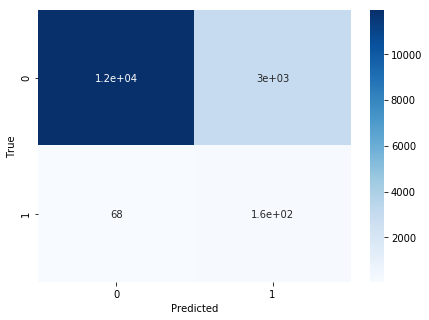

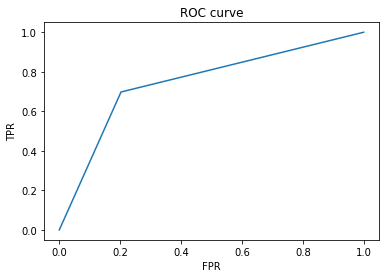

Precision Score = 4.93 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)%
On Sample - 
RandomOverSampler(random_state=0, ratio=None, return_indices=False,
                  sampling_strategy='auto')
              precision    recall  f1-score   support

           0       0.99      0.83      0.91     14941
           1       0.06      0.68      0.11       225

    accuracy                           0.83     15166
   macro avg       0.53      0.75      0.51     15166
weighted avg       0.98      0.83      0.89     15166

Precision Score: 0.05709992486851991
Rec

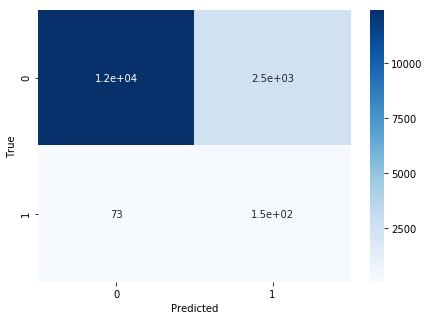

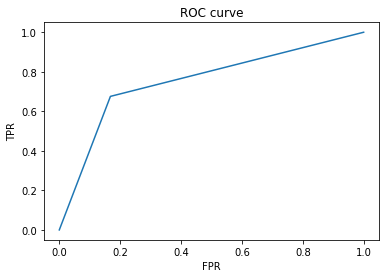

Precision Score = 5.71 %
On Model - 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)%
On Sample - 
SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
      out_step='deprecated', random_state=0, ratio=None,
      sampling_strategy='auto', svm_estimator='deprecated')


In [30]:
#LE + Log Tranformation + Scaling with over sampling Running xgb separately since it throws a mismatch error due to a bug
xgb = XGBClassifier()
for sample in over_sampling:
    X_train2,y_train2 = sample.fit_sample(X_train,y_train)
    X_test2 = X_test.values
    xgb.fit(X_train2,y_train2)
    y_scores = xgb.predict(X_test2)
    precision = precision_score(y_test, y_scores)
    confusion = confusion_matrix(y_test, y_scores)
    print(classification_report(y_test,y_scores))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
    print('Precision Score:',precision_score(y_test, y_scores))
    print('Recall Score:',recall_score(y_test, y_scores))
    print('Roc Auc Score:',roc_auc_score(y_test,y_scores))
    print('Confusion Matrix:\n',confusion)
    plt.figure(figsize = (7,5))
    sns.heatmap(confusion, annot=True,cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    
    print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(xgb)+'%\nOn Sample - \n'+str(sample))
    print('===='*20)

# Selecting the Best Model and Hyper Parameter Tuning

In [35]:
#Best Model selected for higher precision and better recall is:
#Gradient Boosting with LE+Transformation & Scaling with SMOTE

def grid_search_gradient_boosting(dataframe,target):
    gbc = GradientBoostingClassifier()
    param_grid = { 
    'learning_rate': [0.1],
    'min_samples_split': [100, 20, 10,5],
    'min_samples_leaf': [5, 3, 1],
    'max_depth': [2,3,4],
    }
    grid_search_model = GridSearchCV(gbc, param_grid=param_grid,scoring = 'roc_auc')
    grid_search_model.fit(dataframe, target)
    
    return grid_search_model.best_params_

smote = SMOTE()
X_train3,y_train3 = smote.fit_sample(X_train,y_train)
print('Best Parameters are:')
print(grid_search_gradient_boosting(X_train3,y_train3))

Best Parameters are:


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}


              precision    recall  f1-score   support

           0       0.99      0.84      0.91     14941
           1       0.06      0.64      0.10       225

    accuracy                           0.83     15166
   macro avg       0.53      0.74      0.51     15166
weighted avg       0.98      0.83      0.90     15166

Precision Score: 0.05646417445482866
Recall Score: 0.6444444444444445
Roc Auc Score: 0.741136618848954
Confusion Matrix:
 [[12518  2423]
 [   80   145]]


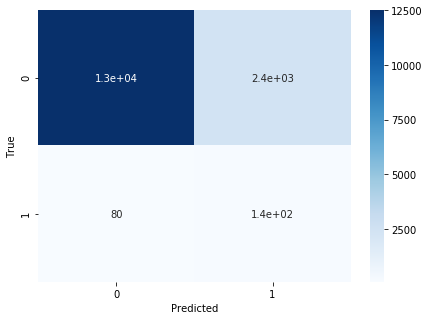

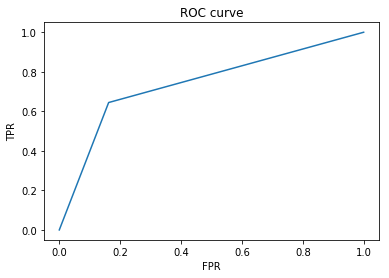

Precision Score = 5.65 %
On Model - 
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [37]:
gbc_grid = GradientBoostingClassifier(learning_rate=0.1,min_samples_split=5,min_samples_leaf=3,max_depth=3)
precision = run_model(X_train3,X_test,y_train3,y_test,gbc_grid)
print('Precision Score = %.2f' %(precision*100) +' %\nOn Model - \n'+str(model))
print('===='*20)

In [39]:
#Data import and Preprocessing
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
X = train_data.drop('Claim',1)
y = train_data['Claim'].copy()
# Creating a dataset with full features for EDA and preprocessing
#X_full = X.append(test_data)
#X_full.head()
#Drop columns with missing values
#X_full = X_full.drop('Gender',1)
test_data = test_data.drop('Gender',1)
X = X.drop('Gender',1)
#ID in test data is needed to submit predictions so we will store it for later
identifiers = test_data['ID'].copy()

#Drop irrelevant features
X = X.drop('ID',1)
#X_full = X_full.drop('ID',1)
test_data = test_data.drop('ID',1)

#Recalculating numeric & categorical features
numeric_columns = numeric_func(X)
categorical_columns = category_func(X)

#Datasets
num_col = ['Duration','Net Sales', 'Commision (in value)', 'Age']
X_test_fin = test_data.copy()

#Since Net Sales & Duration have negative values
for col in num_col:
    if col == 'Net Sales':
        X_test_fin[col] = np.log1p(389+X_test_fin[col])
    elif col == 'Duration':
        X_test_fin[col] = np.log1p(2+X_test_fin[col])
    else:
        X_test_fin[col] = np.log1p(X_test_fin[col])

scaler = StandardScaler()
X_test_fin[num_col]=scaler.fit_transform(X_test_fin[num_col])

#Label Encoding
le = LabelEncoder()
for cols in categorical_columns:
    #le.fit(X_full[cols])
    X_test_fin[cols] = le.fit_transform(X_test_fin[cols])

In [41]:
y_pred = gbc_grid.predict(X_test_fin)
print(y_pred)

[1 1 1 ... 1 1 1]


In [45]:
final_sub = pd.DataFrame(data={'ID': identifiers,'Claim': y_pred})
final_sub.to_csv('predictions101.csv',index=False)